In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import pickle
import glob

from moviepy.editor import VideoFileClip
from IPython.display import HTML

from lane_finder import LaneFinder

%matplotlib inline

In [2]:
def calibrate(debug=False): #=>mtx - transf matrix, dst - dist coef
    """
    Calibrate for camera based on chessboard images in './camera_cal' folder
    This function will also save calibration results (mtx, dst) to the 'dist_pickle.p' file.
    
    
    :param debug: enable debug output
    :returns: tuple of (mtx, dist). Transformation matrix and distortion coefitients.
    """
    nx = 9
    ny = 6
    calib_imgs = glob.glob('./camera_cal/calibration*.jpg')
    
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    
    img_points=[]
    obj_points=[]
    
    # find and record chessboard corners
    for img_path in calib_imgs:
        img = mpimg.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
        
        if ret:
            obj_points.append(objp)
            img_points.append(corners)
            if debug:
                cv2.drawChessboardCorners(gray, (nx, ny), corners, ret)
                f, (pl1, pl2) = plt.subplots(1,2, figsize=(24,9))
                f.tight_layout()
                pl1.set_title(img_path)
                pl1.imshow(img)
                pl2.imshow(gray, cmap='gray')
                plt.show()
        elif debug:
            print('Corners not found for ', img_path)
    
    
    # get camera calibration parameters based on detected artifacts
    ret, mtx, dst, rvec, tvec = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    print('Dist coefs: ', dst)
    
    #save calibration information to file
    dist_pickle = {}
    dist_pickle['mtx'] = mtx
    dist_pickle['dst'] = dst
    pickle.dump(dist_pickle, open( "dist_pickle.p", "wb" ))
    
    return mtx, dst

#calibrate(debug=True)

In [ ]:
# Loading calibration data from file
# It can be regenerated by calling calibrate() function

with  open( "./dist_pickle.p", "rb" ) as f:    
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dst"]
    
print(dist)

[[ -2.35510339e-01  -7.90388401e-02  -1.28492203e-03   8.25970403e-05
    7.22743173e-02]]


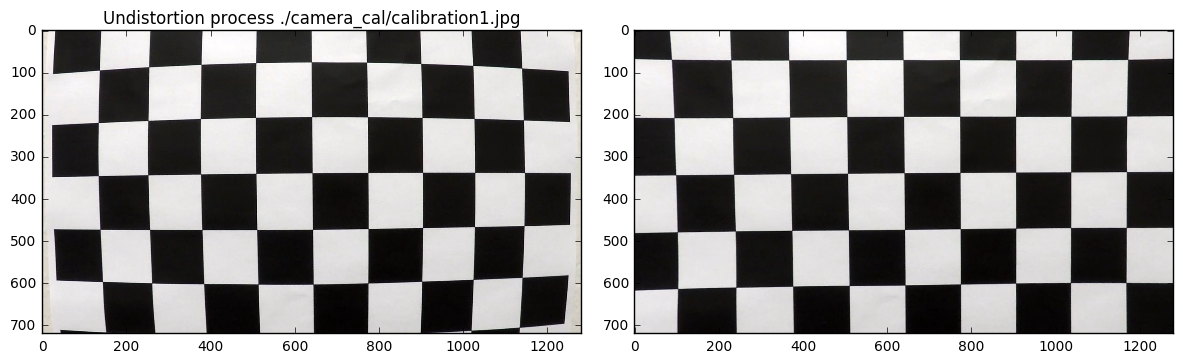

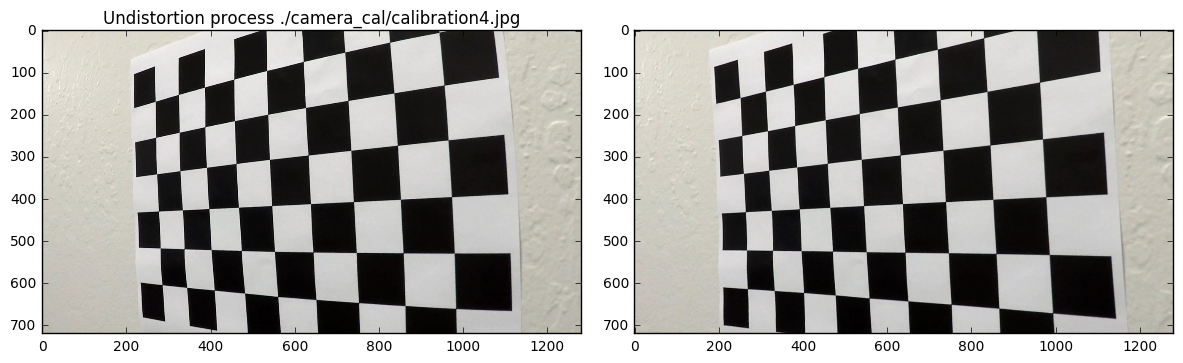

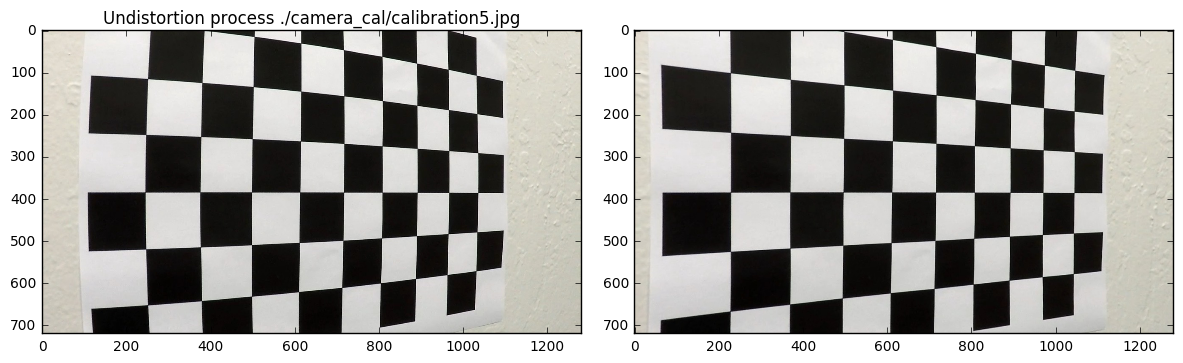

In [4]:
# test undistortion with 1 chessboard and test images

dist_valid_imgs = ['./camera_cal/calibration1.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration5.jpg']
def plot_undistortions(img_arr):
    for path in img_arr:

        test_img = mpimg.imread(path)

        undist = cv2.undistort(test_img, mtx, dist, None, None)

        f, (pl1, pl2) = plt.subplots(1,2, figsize=(12,4))
        f.tight_layout()
        pl1.set_title('Undistortion process '+ path)
        pl1.imshow(test_img)
        pl2.imshow(undist)
        plt.show()
plot_undistortions(dist_valid_imgs)

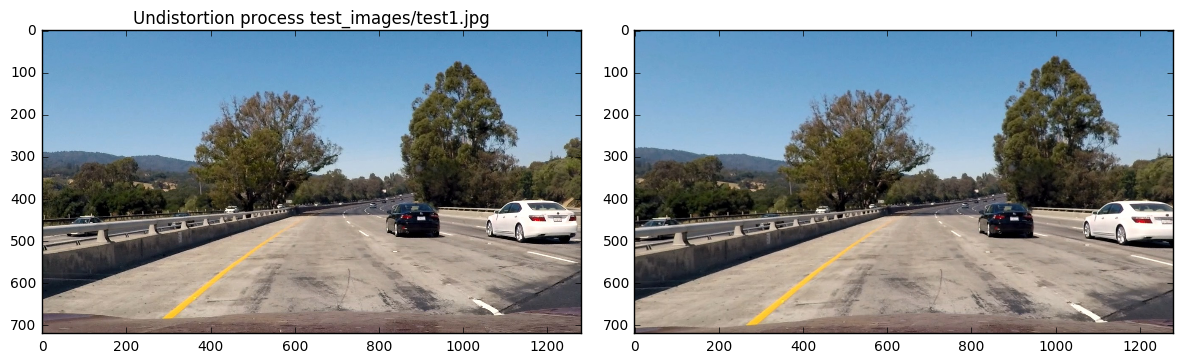

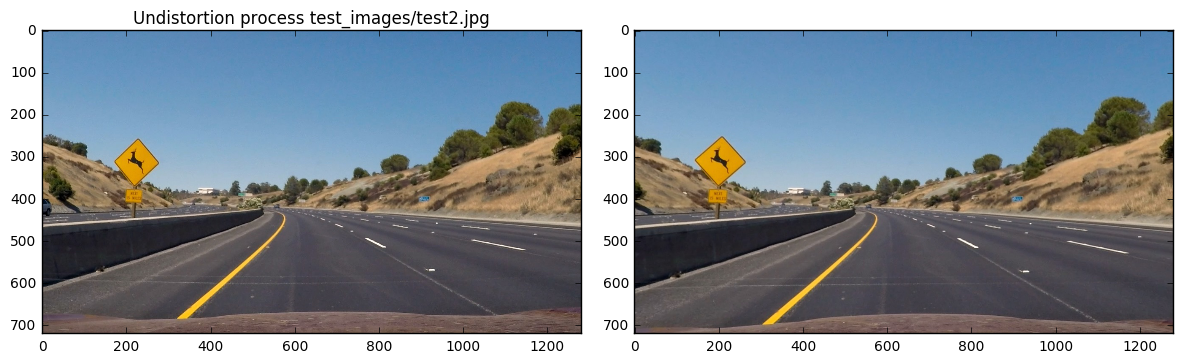

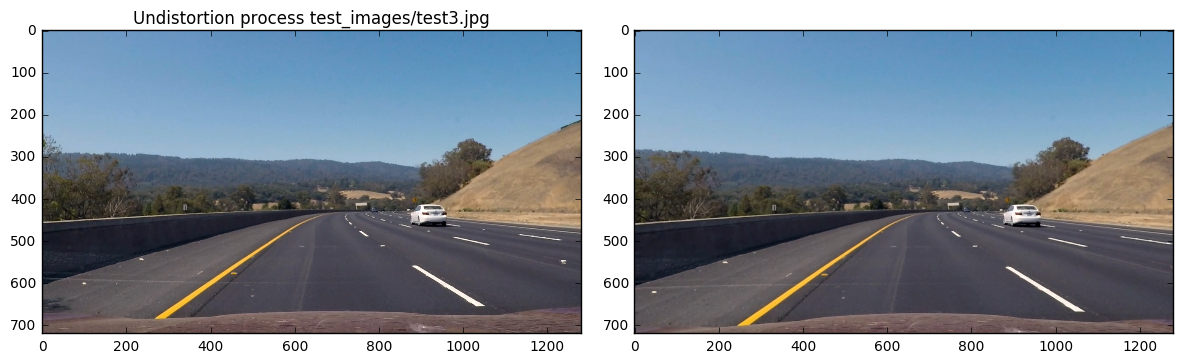

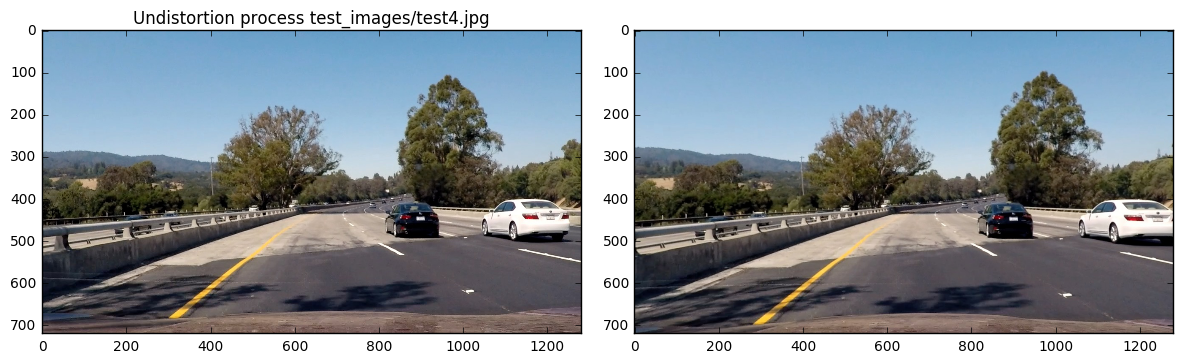

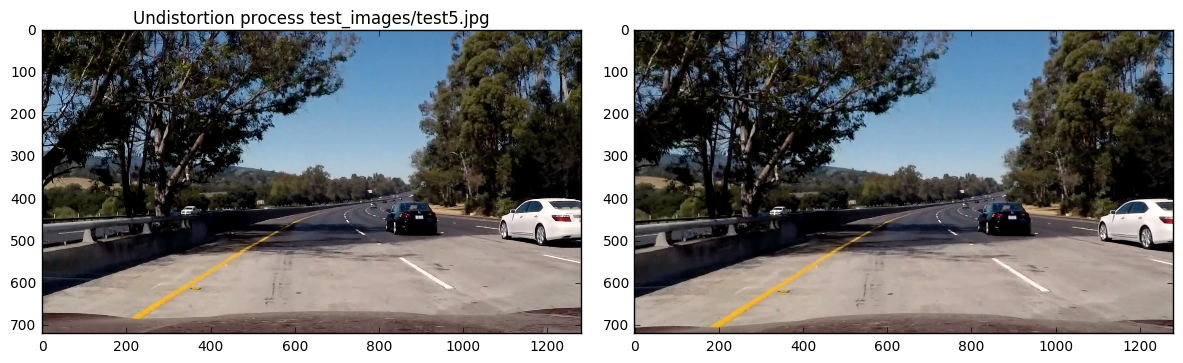

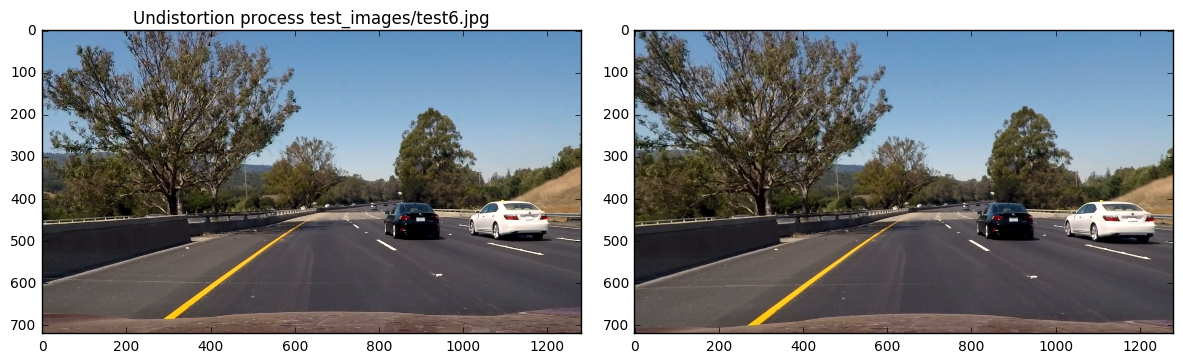

In [5]:
# For Test purposes display undistorted images from test folder

test_imgs = glob.glob('test_images/test*.jpg')
plot_undistortions(test_imgs)

### Image transformation 
Now lets transform our images from pipleline to a top-down view.

In [5]:

    

def plot_image_pair(im1, title1, im2, title2='', cmap2='hsv'):
    """
    Plot pair of images side by side.
    :param im1: left image array
    :param title1: title for left image
    :param im2: right image
    :param title2: right title
    """
    f, (pl1, pl2) = plt.subplots(1,2, figsize=(12,4))
    f.tight_layout()
    pl1.set_title(title1)
    pl1.imshow(im1)
    pl2.imshow(im2, cmap=cmap2)
    pl2.set_title(title2)
    plt.show()

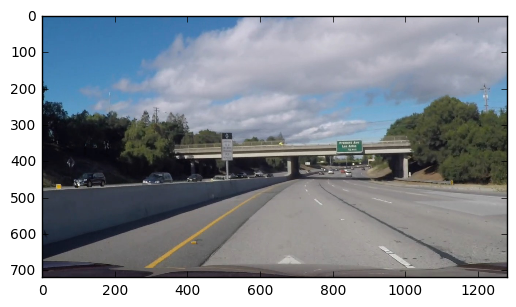

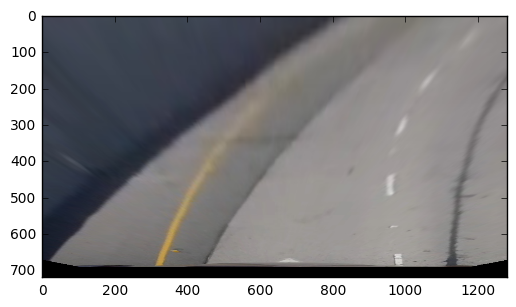

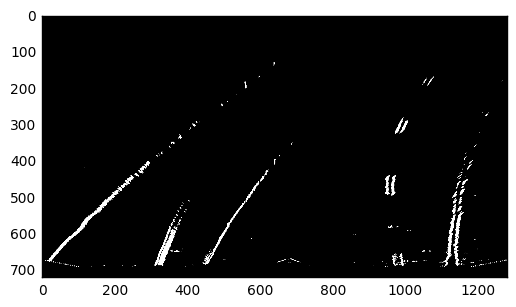

Starting lane search from left=330, right=1139
Win height: 72, n_windows=10
left_center_x=330
win_y=720, left_center_x=329, right_center_x=1131
win_y=648, left_center_x=348, right_center_x=1130
win_y=576, left_center_x=348, right_center_x=1138
win_y=504, left_center_x=348, right_center_x=1149
win_y=432, left_center_x=289, right_center_x=1149
win_y=360, left_center_x=289, right_center_x=1149
win_y=288, left_center_x=289, right_center_x=1149
win_y=216, left_center_x=289, right_center_x=1149
win_y=144, left_center_x=289, right_center_x=1149
win_y=72, left_center_x=289, right_center_x=1149


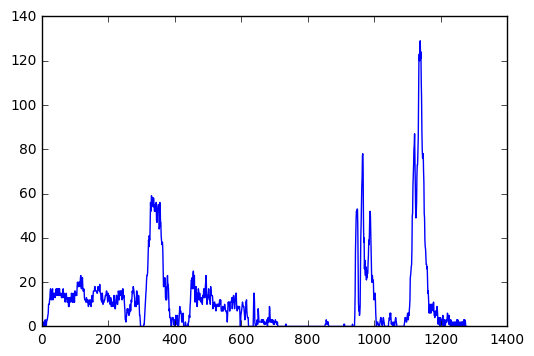

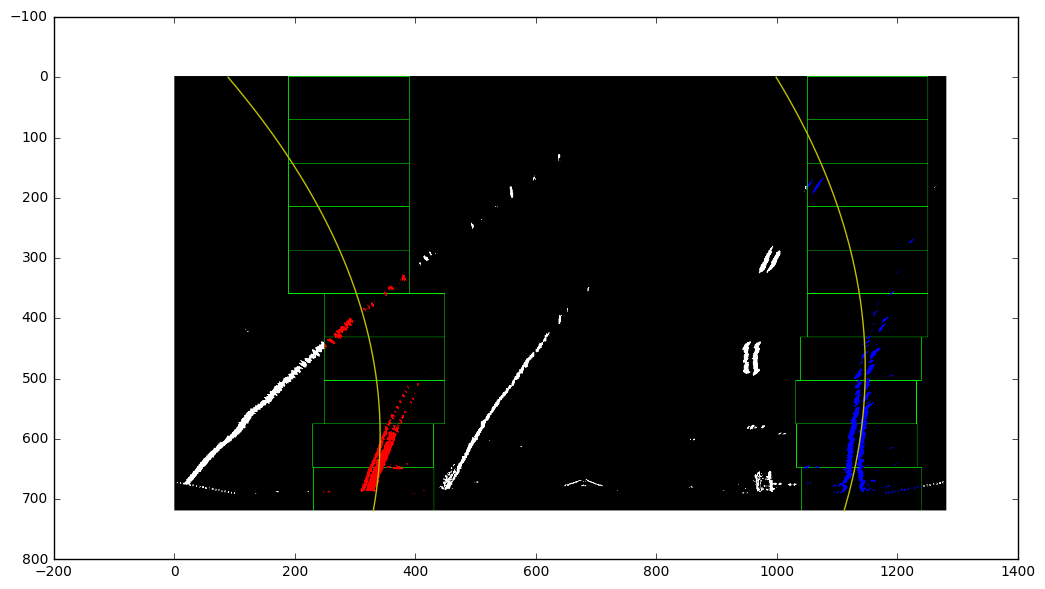

Radius l=247.7, r=280.9, lane_center=390.4, car_delta=1.2m


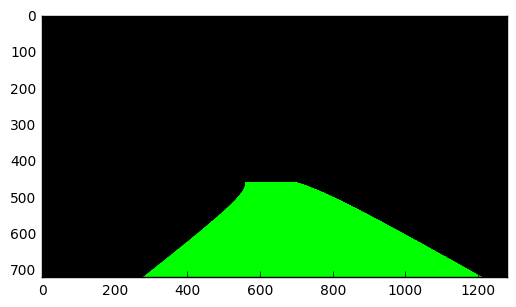

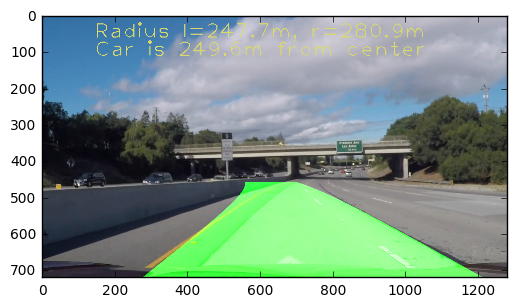

In [3]:
# Just run processing test in Debug mode for one image
ln_finder = LaneFinder(mtx, dist)
tst_img = mpimg.imread('./test_images/test9.jpg')
plt.imshow(tst_img)
plt.show()
#comb = undistort_transform(tst_img, mtx, dist, M)
comb = ln_finder.process_image(tst_img, debug=True)
# src_pt1 = np.array([(704, 460), (580, 460), (273, 672), (1032, 672)], np.int_)
# cv2.polylines(tst_img, [src_pt1], True, (255, 0, 0))
# mpimg.imsave('./output_images/rect-s2-50.jpg', comb)

# M = getTransformationMatrix(top_y=50)
# comb2 = undistort_transform(tst_img, mtx, dist, M)
# plot_image_pair(comb, '150', comb2, '50')
# mpimg.imsave('./output_images/rect-y50.jpg', comb2)

# M0 = getTransformationMatrix(top_y=0)
# comb0 = undistort_transform(tst_img, mtx, dist, M0)
# M250 = getTransformationMatrix(top_y=250)
# comb250 = undistort_transform(tst_img, mtx, dist, M250)
# plot_image_pair(comb0, '0', comb250, '250')
# mpimg.imsave('./output_images/rect-y0.jpg', comb0)
# mpimg.imsave('./output_images/rect-y250.jpg', comb250)




plt.imshow(comb)
plt.show()
# findLaneLines(comb, True)

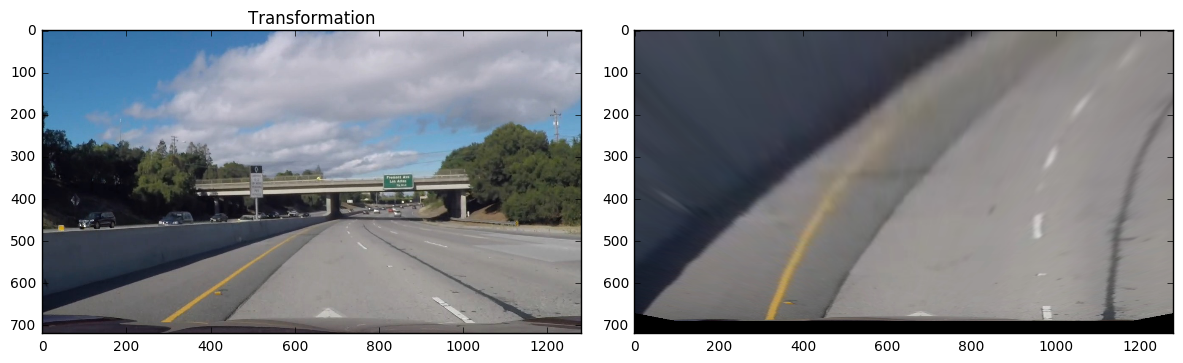

In [10]:
# test for transformation to show some output
tst_img = mpimg.imread('./test_images/test8.jpg')
comb = ln_finder.undistort_transform(tst_img)
plot_image_pair(tst_img, 'Transformation', comb)

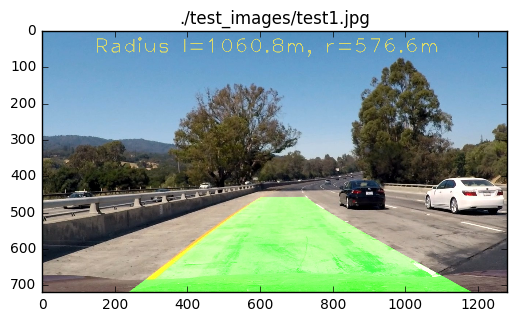

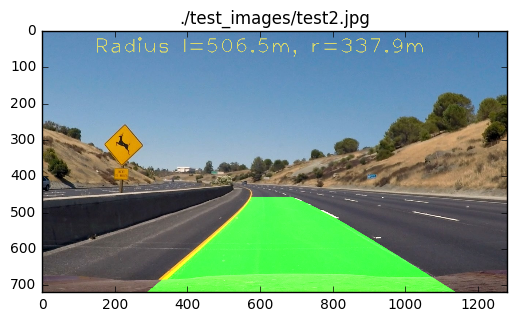

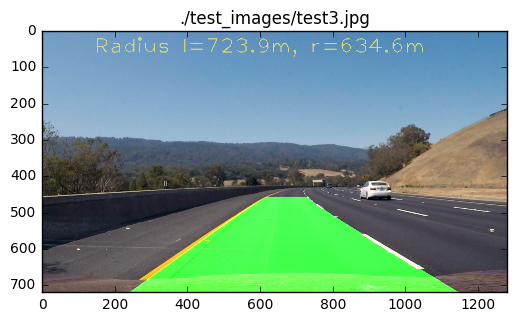

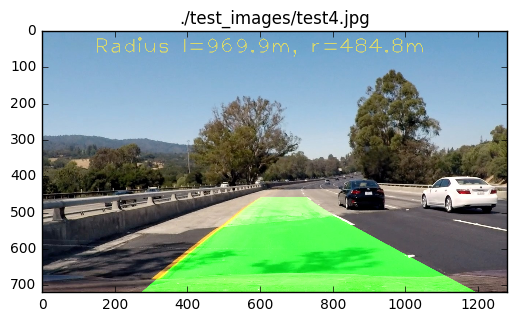

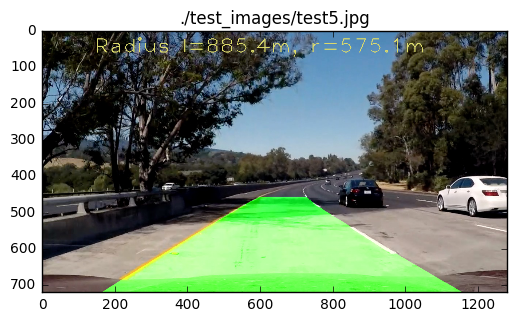

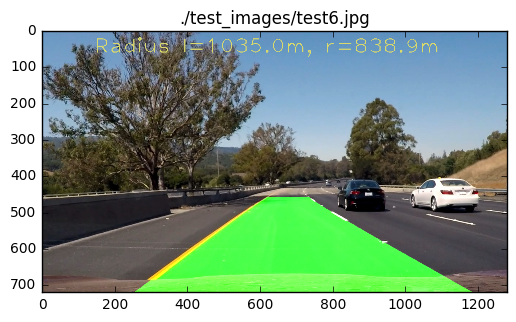

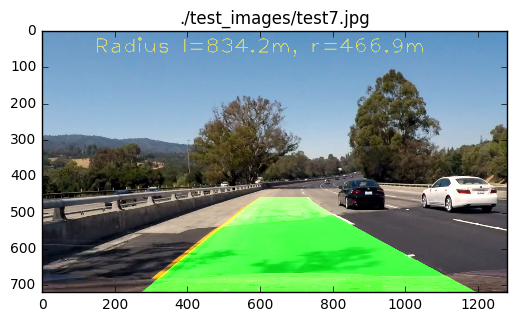

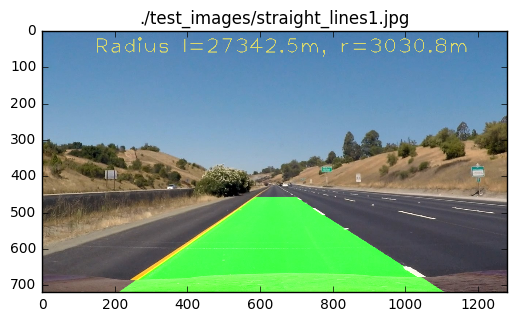

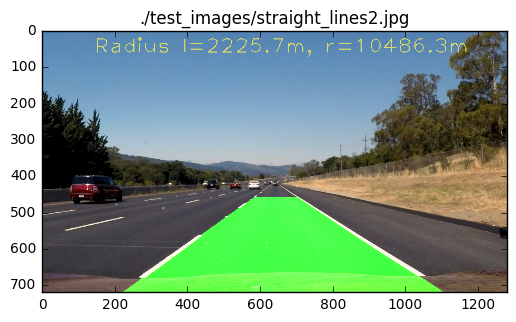

In [6]:
# Display set of processed images from test folder

paths = glob.glob('./test_images/test*.jpg')
paths.append('./test_images/straight_lines1.jpg')
paths.append('./test_images/straight_lines2.jpg')



for path in paths:
    im = mpimg.imread(path)
    
    plt.title(path)
    plt.imshow(ln_finder.process_image(im))
    plt.show()

In [5]:
# Execute processing with video file and save it to output folder

vid_output = './output_images/vid_challenge_out.mp4'
clip1 = VideoFileClip("./challenge_video.mp4", audio=False)#.cutout(0, 37)
clip = clip1.fl_image(ln_finder.process_image) 

%time clip.write_videofile(vid_output, audio=False)

TypeError: undistort_transform() takes 2 positional arguments but 5 were given